<a href="https://colab.research.google.com/github/rsilraf/bootcamp_datascience_alura2021/blob/main/Notebooks/Alura_bootcamp_Data_Science_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 1

## Aula 01

In [62]:
import pandas as pd

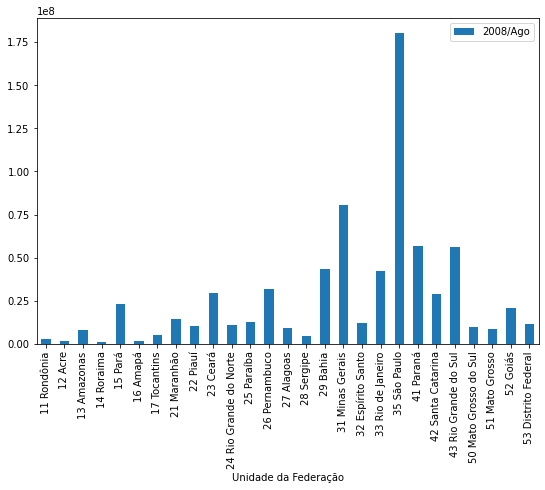

In [63]:
pd.options.display.float_format = "{:2}".format

DATA_FILE = "/content/drive/MyDrive/Colab Notebooks/bootcamp_ds_alura/amatend-A125835189_28_143_208.csv"

dados = pd.read_csv( DATA_FILE, 
                    encoding="ISO-8859-1", sep=";", 
                    skiprows=3, skipfooter=12, 
                    thousands=".", decimal=",",
                    engine='python'
                    )

dados.tail()
# dados["2008/Ago"].mean()
dados.plot(x="Unidade da Federação", 
           y="2008/Ago",
           kind="bar",
           figsize=(9,6)
          )


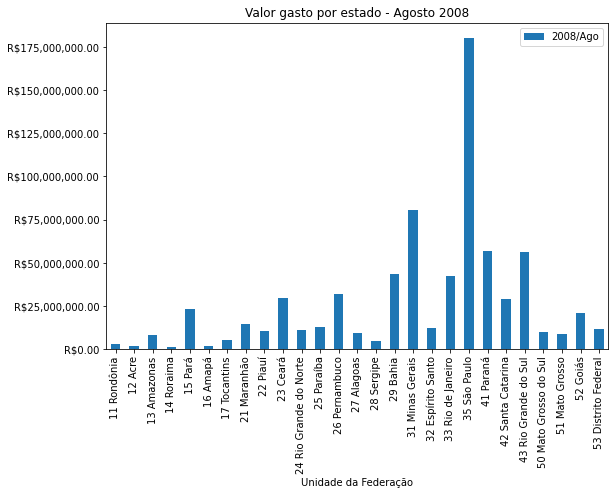

In [64]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x="Unidade da Federação", 
           y="2008/Ago",
           kind="bar",
           figsize=(9,6))
plt.title("Valor gasto por estado - Agosto 2008")
ax.yaxis.set_major_formatter(
    ticker.StrMethodFormatter("R${x:,.2f}"))

### DESAFIOS
1)
Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.

2)
Faça a mesma análise realizada em aula, porém para o mês mais recente.

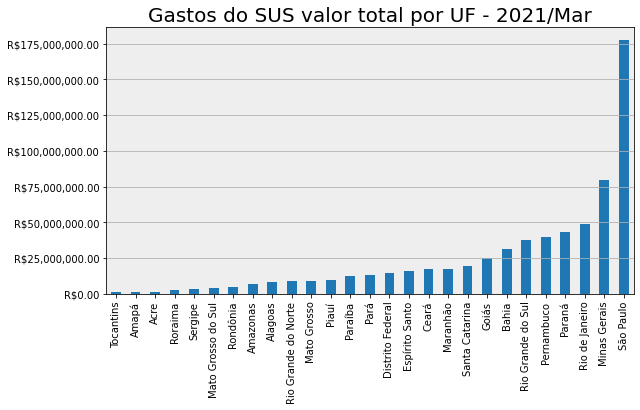

In [65]:
import re
UF = 'Unidade da Federação'
RE_NUMEROS = r'\d+ '

dados[UF]      = dados[UF].apply(lambda uf: re.sub( RE_NUMEROS, '', uf ))  # limpa uf, ex: '12 Acre' -> 'Acre'
mais_recente   = dados.columns[-2]  # <ano YYYY>/<mes abc>
dados_recentes = dados.sort_values(by=mais_recente)

ax = dados_recentes.plot(x=UF, y=mais_recente, kind='bar', figsize=(9,6))

plt.title(f'Gastos do SUS valor total por UF - {mais_recente}', fontsize=20)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
ax.set_facecolor('#eee')
ax.grid(axis='y')
plt.tight_layout()
plt.xlabel('')
ax.get_legend().remove()


## Aula 02

In [66]:
import pandas as pd
pd.options.display.float_format = "{:2}".format

DATA_FILE = "/content/drive/MyDrive/Colab Notebooks/bootcamp_ds_alura/amatend-A125835189_28_143_208.csv"

dados = pd.read_csv( DATA_FILE, 
                    encoding="ISO-8859-1", sep=";", 
                    skiprows=3, skipfooter=12, 
                    thousands=".", decimal=",",
                    # parse_dates=True, infer_datetime_format=True,
                    engine='python'
                    )
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.2,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.2,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.2,7490440.6,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.6,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.2,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.9,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.0,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.5,14965815.9,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.2,20451573.77,21546059.48,24439059.57,13679358.06,6799060.8,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.4,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.2,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.9,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.0,35039954.2,35424611.06,34160283.18,34484949.49,35618364.04,34380916.9,38441090.5,33583538.08,32789354.87,34513534.8,31885919.67,33236155.79,31008924.95,31064106.5,28543179.3,36713929.36,36462011.47,36792954.02,36984314.6,35579251.49,35247659.3,37046350.76,34683341.17,34908420.5,29184688.3,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.1,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [67]:
dados[['2008/Ago','2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.8
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [68]:
UF = 'Unidade da Federação'
colunas_usaveis = [UF] + dados.mean().index.tolist()
# ou
# colunas_usaveis.insert(0, 'Unidade da Federação')
usaveis = dados[colunas_usaveis]
usaveis.head() 

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.2,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.6,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8457455.71,7766983.2,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.2,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.2,7490440.6,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.6,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.8,2230838.45,2122013.12,2196651.69,2152239.3,2086775.61,2476364.26,2396887.63,2610261.8,2174098.1,2051885.16,1714707.91,1341532.34,2288458.9,2462712.79,2254900.2,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.6,2454599.37,2578923.75,2625443.29,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.2,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.9,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.3,2020381.79,5949408.99,11419210.08,7934652.1,8641517.13,8531576.49,9079902.15,8646295.77,8755806.5,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.2,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.5,9140196.88,9437224.41,9742680.49,9996686.44,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.0,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.5,14965815.9,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.2,20451573.77,21546059.48,24439059.57,13679358.06,6799060.8,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.1,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.4,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,

In [69]:
usaveis.set_index(UF, inplace=True)
usaveis.loc['12 Acre']

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Dez     3711660.71
2021/Jan     3005561.16
2021/Fev      2272733.9
2021/Mar     1137341.65
Total      450048530.47
Name: 12 Acre, Length: 165, dtype: float64

In [70]:
# usaveis.plot(figsize=(12,6))
usaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,134605.36,97352.78,400640.85,104243.75,27453.63,135146.36,971394.37,57408.11,469469.34,1665349.9,554800.22,693955.05,1049252.33,199556.12,63562.5,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,272088.08,368130.43,1088340.42,174024.9,78565.19,448349.75,2861781.5,284224.8,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.3,43852.67,1893197.5,118378.28,343702.61,2277717.78,1078182.68,1865065.71,684678.3,1002088.64,2973553.48,595544.54,122952.94,1382038.11,10018011.35,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,1695824.89,2149873.4,6699828.82,1125396.73,775705.52,3348779.62,21730281.63,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.8,1995899.52,1740439.6,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.9,3022200.87,8832514.85,4929772.93,10798042.86,4730811.68,5448177.36,16919031.39,2564966.65,2765495.63,11948984.56,43429517.54,5724199.54,13627123.27,76668547.41,28790722.87,14772555.1,30134255.7,4277979.14,5394225.43,9293914.78,7121965.42


In [71]:
usaveis.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Dez,9003402.23,3711660.71,21546059.48,3125021.9,36914437.92,2826612.42,689383.43,30927070.93,19352220.14,50271552.33,27277816.41,20355212.85,77877186.72,17462663.52,10997949.03,83131785.74,166376967.67,40500910.57,90567351.87,326846228.95,122146256.92,72720675.11,116833971.73,21387005.58,18852854.81,37614253.55,22552034.04
2021/Jan,8414690.6,3005561.16,24439059.57,3209323.68,33887773.65,2513766.36,347626.85,26797697.76,18437275.64,43743425.74,23228004.8,20149018.68,76810042.34,16496784.27,7149727.62,70325599.07,155064483.25,33767261.13,87201907.99,324115425.7,106948897.53,57281832.19,102317646.36,16027788.65,15890528.31,35655886.73,22573869.5
2021/Fev,6039419.59,2272733.9,13679358.06,3044798.77,23343222.94,1534733.18,416534.32,23260245.95,13636005.36,30186951.0,18186942.8,16996494.03,62259409.32,12792571.64,4129845.36,55544579.04,119877417.15,25669612.63,60873103.08,268193064.06,83130175.37,47429335.91,84404640.0,11428462.42,13207979.82,32253788.65,19004029.87
2021/Mar,4732441.04,1137341.65,6799060.8,2381844.31,13069564.31,989155.4,928756.84,17294509.11,9542151.53,17173151.55,8733455.36,12517894.05,39472738.81,8180887.21,3081081.42,31314602.44,79780838.0,15606368.11,49149884.48,177408317.71,43480729.07,19375822.56,37798832.8,4035989.77,8835890.09,24867001.02,14731938.43
Total,996411254.68,450048530.47,1917247936.05,328876965.09,4705309002.29,309860092.59,1020028272.64,3871069498.04,2280888802.74,6591836650.18,2660122027.15,2614919044.63,8581189975.91,2236415402.51,1215853015.0,9791541570.52,20418737536.66,3405850698.58,10337389922.09,41396408548.81,14681514706.67,7835011163.4,12764391179.92,2324525096.33,2180119781.15,4973572261.43,2592422853.56


In [72]:
usaveis = usaveis.drop("Total", axis=1)

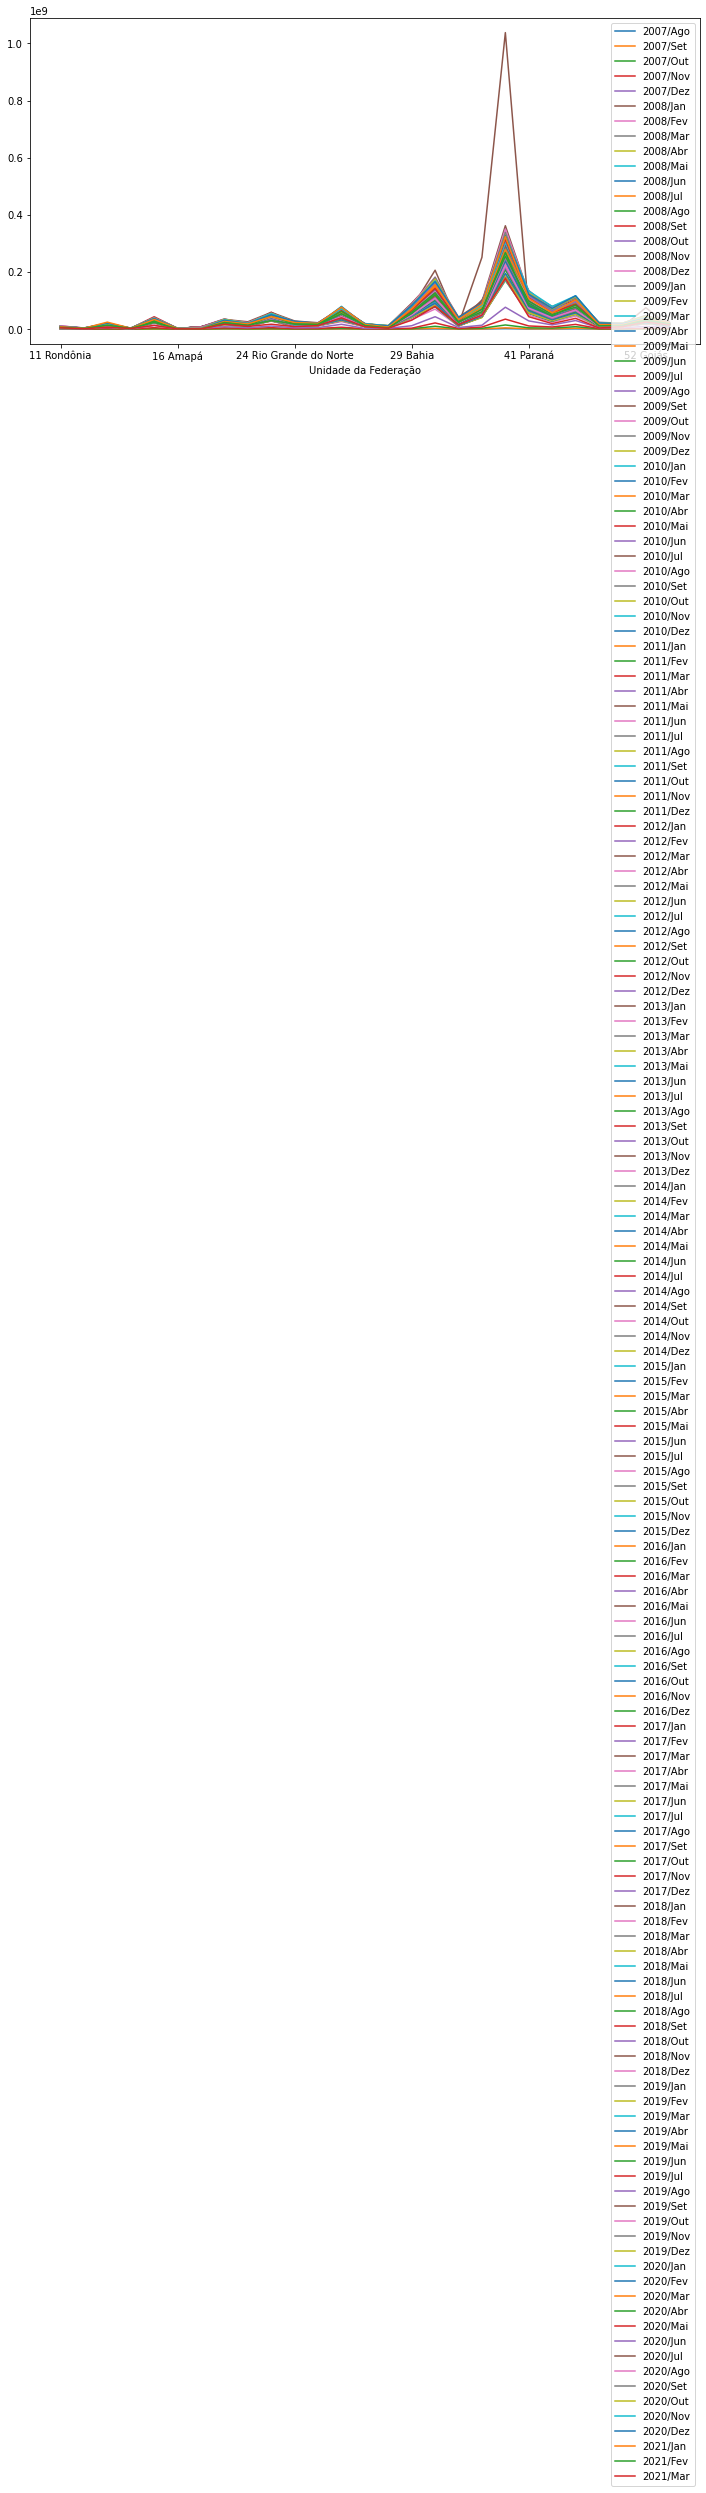

In [73]:
usaveis.plot(figsize=(12,6))

In [74]:
usaveis.T.loc['2007/Ago']

Unidade da Federação
11 Rondônia                 4209.37
12 Acre                    10470.07
13 Amazonas                35752.72
14 Roraima                  4785.91
15 Pará                   181159.29
16 Amapá                   33672.74
17 Tocantins                4113.76
21 Maranhão               385330.18
22 Piauí                  220788.25
23 Ceará                  357904.65
24 Rio Grande do Norte    134605.36
25 Paraíba                 97352.78
26 Pernambuco             400640.85
27 Alagoas                104243.75
28 Sergipe                 27453.63
29 Bahia                  135146.36
31 Minas Gerais           971394.37
32 Espírito Santo          57408.11
33 Rio de Janeiro         469469.34
35 São Paulo              1665349.9
41 Paraná                 554800.22
42 Santa Catarina         693955.05
43 Rio Grande do Sul     1049252.33
50 Mato Grosso do Sul     199556.12
51 Mato Grosso              63562.5
52 Goiás                  179395.82
53 Distrito Federal       191951.47
Name: 2

### DESAFIOS
1) Reposicionar a legenda do gráfico em uma posição mais adequada

2) Plotar o gráfico de linha com apenas 5 estados de sua preferência


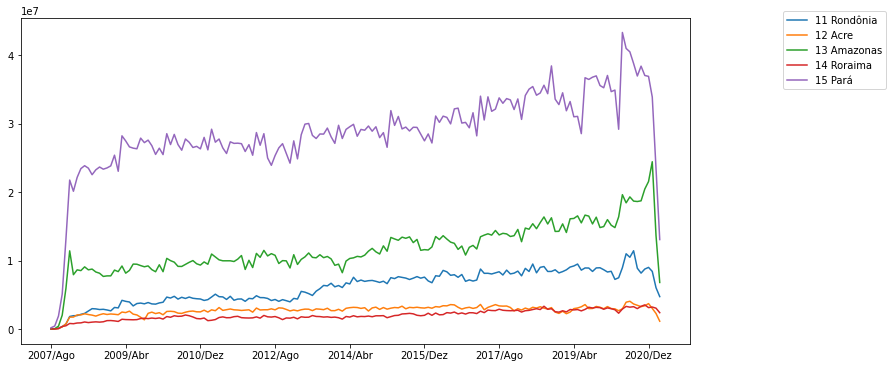

In [75]:
# import numpy as np
# np.random.seed(687942)

# :: DESAFIO 2 :: plotar 5 estados (de escolha ou aleatórios)
# usaveis.T[['15 Pará', '29 Bahia', '31 Minas Gerais', '33 Rio de Janeiro', '35 São Paulo']].plot(figsize=(12,6))
# usaveis[:5].T.plot(figsize=(12,6))
# usaveis.sample(5).T.plot(
# usaveis[:5].loc[:, ~usaveis.columns.isin(['Região', 'Total']) ].T.plot(  #  pula colunas Região, Total
usaveis[:5].T.plot(
    figsize=(12,6)
)
plt.legend(loc='right', bbox_to_anchor=(1.3,.9))  # :: DESAFIO 1 :: reposicionar legenda



## Aula 03





### DESAFIOS

1) Escolher uma palete de cores mais adequada do matplotlib

2) Adicionar coluna da região de cada estado

3) Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)


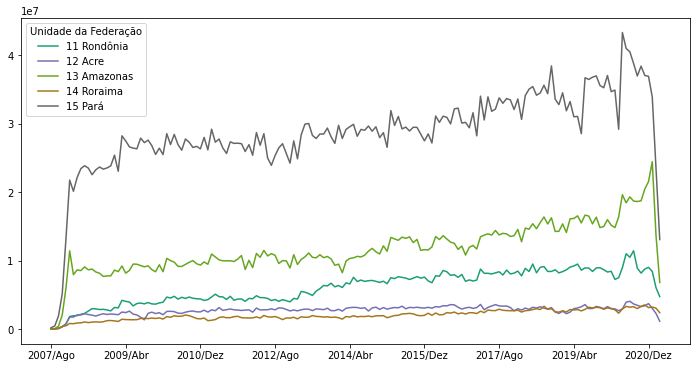

In [76]:
#usaveis[:5].loc[:, ~usaveis.columns.isin(['Região', 'Total']) ].T.plot(  #  pula colunas Região, Total
usaveis[:5].T.plot(
    figsize=(12,6),
    cmap= 'Dark2'  # :: DESAFIO 1 :: mudar palete de cores - https://matplotlib.org/stable/gallery/color/colormap_reference.html                                                       
)


In [77]:

## :: DESAFIO 2 :: adicionar coluna de região de cada estado
regioes = {
  'Norte'       : ['Amazonas', 'Roraima', 'Amapá', 'Pará', 'Tocantins', 'Rondônia', 'Acre'],
  'Nordeste'    : ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Pernambuco', 'Paraíba',
                   'Sergipe', 'Alagoas', 'Bahia'],
  'Centro-Oeste': ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás'],
  'Sudeste'     : [ 'São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais'],
  'Sul'         : ['Paraná', 'Rio Grande do Sul', 'Santa Catarina'],
  'DF'          : ['Distrito Federal'],
}
def get_regiao( uf: str)-> str:
  ''' retorna regiao da uf informada '''
  for regiao, estados in regioes.items():
    # if ' '.join(uf.split()[1:]) in estados:
    if uf[3:] in estados:  #  pula <numero><espaço> na uf
      return regiao

usaveis_com_regiao = usaveis.copy()

if not 'Região' in usaveis_com_regiao.columns:  # evita adicionar mais de uma vez na reexecução desta célula
  usaveis_com_regiao['Região'] = list(map( get_regiao, usaveis_com_regiao.index.tolist()))  # <<<<< Nova coluna com a resolução da região
  usaveis_com_regiao = usaveis_com_regiao.reindex(columns=['Região'] + usaveis_com_regiao.columns.tolist()[:-1])  # reordena colunas com Região primeiro

usaveis_com_regiao.sample(5)

# usaveis.sample(5)

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
28 Sergipe,Nordeste,27453.63,78565.19,122952.94,775705.52,2765495.63,5439985.99,4636850.76,5017838.07,5265951.03,5367094.94,4981036.36,4928822.87,4543252.5,4525676.82,4566052.38,4716241.96,4272627.88,5037054.4,4983217.59,6504862.57,5772732.46,6111674.22,5789895.43,6122676.14,6105674.9,6019912.61,5852499.57,5722988.22,5201100.49,6261031.57,5754032.25,7057311.82,6758264.65,7452360.44,5958403.64,6660243.3,7061516.92,6924628.71,6663604.22,...,7350893.95,9313556.4,7817772.09,9831536.21,8649405.83,9127323.57,9141588.81,9026038.83,9572164.12,9027721.47,10099292.36,8939051.71,8885595.93,10057876.32,9465338.97,9455876.39,10229651.99,11156849.6,9818775.39,10144599.12,10075280.52,9641013.11,9980401.55,9282433.76,9240681.24,9626956.33,9186554.56,9226713.03,8721205.93,9419572.73,10458350.95,11700344.16,12434101.29,11488626.57,12571979.79,11816872.93,10997949.03,7149727.62,4129845.36,3081081.42
33 Rio de Janeiro,Sudeste,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,44111107.27,44359056.71,42500830.29,43066461.47,44553314.55,41351511.51,43024756.36,60885459.85,40668378.23,52753544.47,48916675.76,51177398.6,57241944.15,53485657.68,51244087.82,48489476.33,48689069.43,49708372.48,44413423.34,55993709.91,44833345.11,54473238.33,78128632.98,56028875.32,51435826.33,53873907.49,57867285.17,53736019.37,52379338.55,...,67378799.43,72453040.87,65060331.66,74428736.76,74579184.72,79419042.03,75991764.07,77576014.21,78916904.64,72869420.27,79188399.76,74018397.83,70831514.1,79663329.44,74142875.38,75063150.71,76859575.91,82670993.34,78689231.48,88182408.0,83624113.3,81561944.39,82534679.94,74778468.98,75149065.87,80411863.59,73147214.02,74595986.0,69437941.81,89725279.21,88135690.57,95941141.03,89795469.41,81886688.22,80570244.2,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48
21 Maranhão,Nordeste,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,14553978.06,14536700.2,14609872.57,15317881.85,15617699.59,15643973.86,14644528.47,16509174.38,15323800.01,19000528.61,17947811.13,18274483.44,18108112.36,18026071.2,18566524.68,18710607.19,19044993.31,18373019.22,17558736.88,19282093.56,17569101.52,21316090.03,19804547.24,20646225.47,19887224.9,20272804.23,20504334.4,20002266.78,19676260.18,...,27083233.19,29443684.76,26363802.42,29905370.54,30897068.02,30281504.24,28453973.46,30806965.3,30838532.57,29976987.17,31005862.24,28237905.9,27802462.95,30160826.23,27614666.06,30322908.98,30475196.99,32603116.94,29836256.42,31293695.07,31374933.66,31617443.39,30205022.97,31081861.45,29882634.85,31644389.22,28876348.04,29401096.62,24555641.06,34835605.89,35894441.09,33991348.7,32711259.43,31985709.32,34430463.5,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11
24 Rio Grande do Norte,Nordeste,134605.36,272088.08,684678.3,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10260681.64,10721328.37,12298227.11,11640067.28,12397524.2,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.6

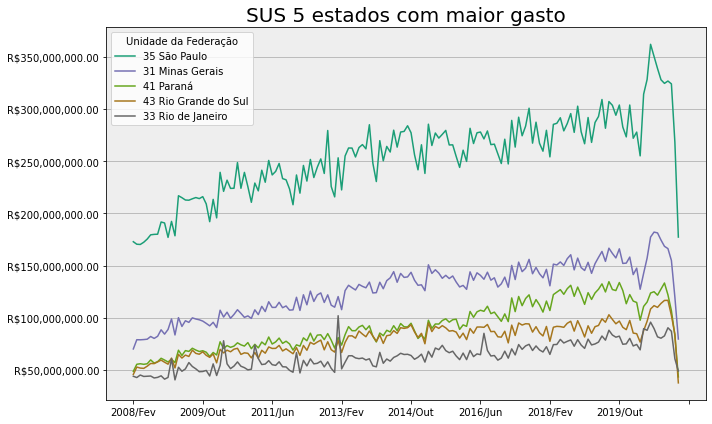

In [78]:
# :: Desafio 03 ::  ESTADOS QUE MAIS GASTARAM
if not 'Total' in usaveis.columns.tolist():
  usaveis['Total'] = usaveis.loc[:, usaveis.columns != 'Região'].sum(axis=1)
# usaveis.sort_values("Total", ascending=False)
usaveis.head()



ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
# ordenado_por_total.head()

# limpeza de picos manual
# pula até 2008/jan para tirar o pico
colunas_interessadas = ordenado_por_total.columns[6:].tolist()
ordenado_por_total = ordenado_por_total[colunas_interessadas]

ax = ordenado_por_total.head(5).T.plot( 
    figsize=(10,6),
    cmap = 'Dark2'
)
plt.title('SUS 5 estados com maior gasto', fontsize=20)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
ax.set_facecolor('#eee')
ax.grid(axis='y')
plt.tight_layout()

### DESAFIOS

4) adicione um outro estado

5) Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue.

R: comparado 2013 com 2014, 2013 teve muito mais ocorrências de dengue segundo o seguinte boletim epidemiológico:
https://antigo.saude.gov.br/images/pdf/2014/outubro/15/Boletim-Dengue-SE39-2.pdf

6) Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

7) Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

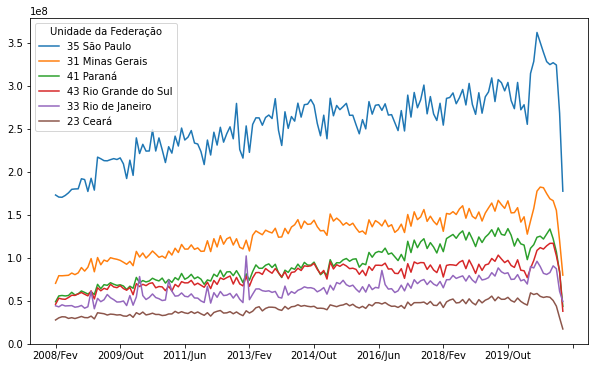

In [79]:
# :: DESAFIO 4 :: adicione outro estado
ordenado_por_total.head(5).append(ordenado_por_total.loc[['23 Ceará',]]).T.plot(
    figsize=(10,6)
)


Text(0.5, 0, 'aparentemente pico de fev/13 se deu apenas no RJ')

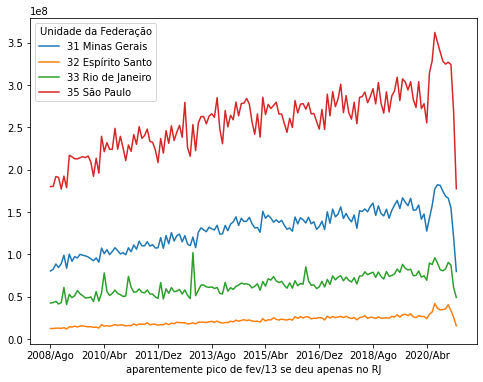

In [80]:
# :: DESAFIO 6 :: plotar apenas sudeste e verificar se pico 2013/fev ocorreu em todos os estados
# pula até 2008/jan para tirar o pico
colunas_interessadas = ordenado_por_total.columns[6:].tolist()

ax = usaveis_com_regiao[usaveis_com_regiao['Região'] == 'Sudeste'][colunas_interessadas].\
   T.plot(
    figsize=(8,6),
   )
ax.set_xlabel('aparentemente pico de fev/13 se deu apenas no RJ')

## Aula 04


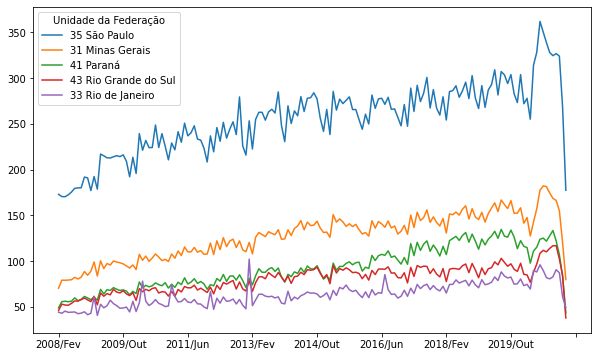

In [81]:
# (ordenado_por_total / 1_000_000).head(5).T.plot(figsize=(10,6))

ordenado_por_total = ordenado_por_total / 1_000_000
ordenado_por_total.head(5).T.plot(figsize=(10,6))

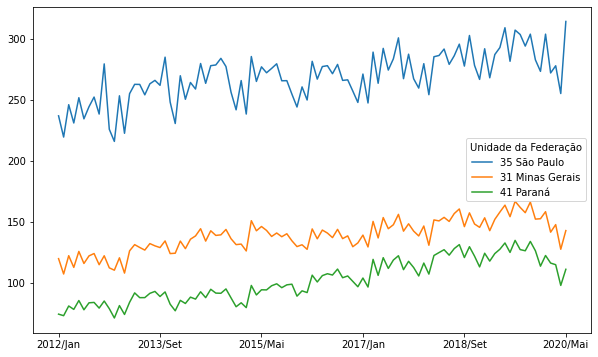

In [82]:
meses_filtrados = ordenado_por_total.columns[47:148]
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(10,6))


(0.0, 350.0)

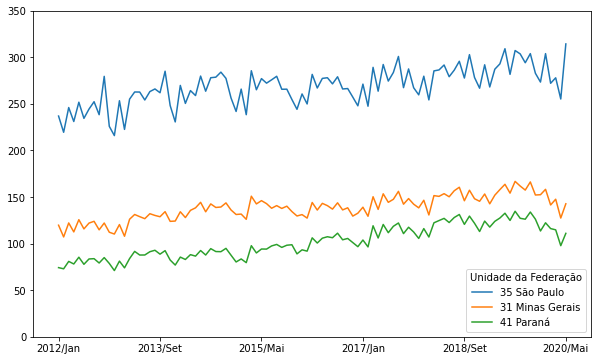

In [83]:
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

(100.0, 350.0)

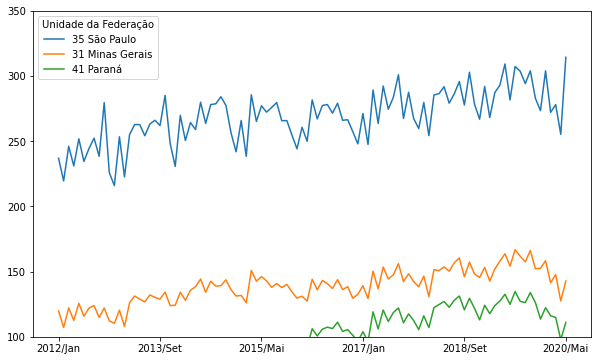

In [84]:
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(100, 350)

(0.0, 350.0)

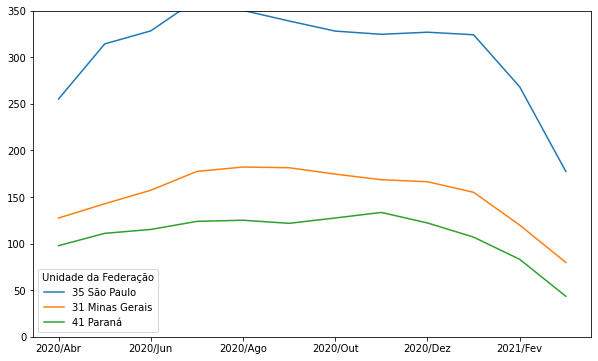

In [85]:
ordenado_por_total[ordenado_por_total.columns[-12:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

(0.0, 350.0)

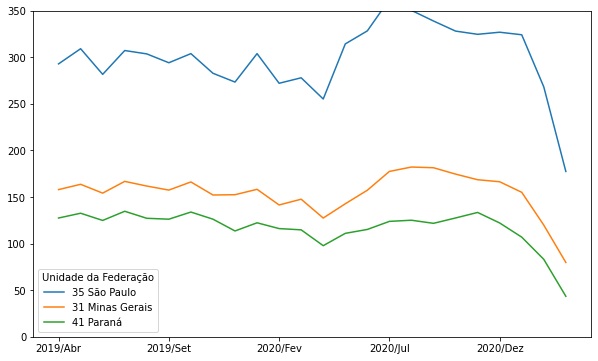

In [86]:
ordenado_por_total[ordenado_por_total.columns[-24:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

(0.0, 350.0)

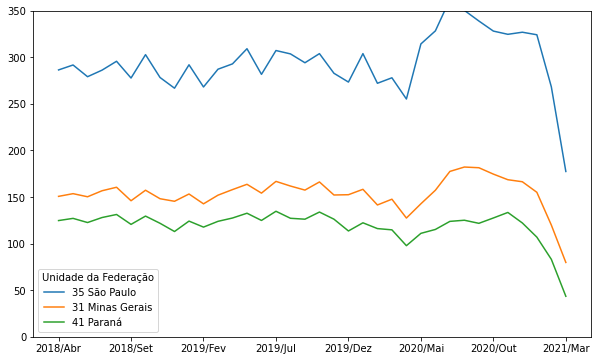

In [87]:
ordenado_por_total[ordenado_por_total.columns[-36:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

(0.0, 350.0)

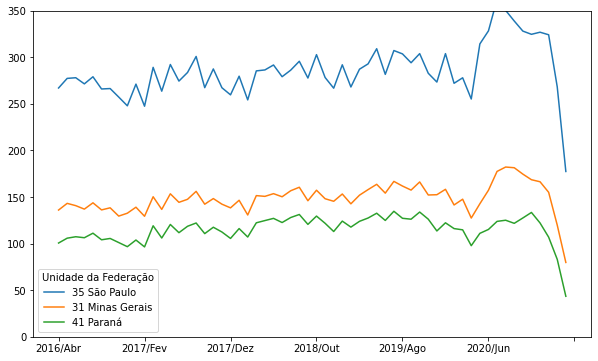

In [88]:
ordenado_por_total[ordenado_por_total.columns[-60:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

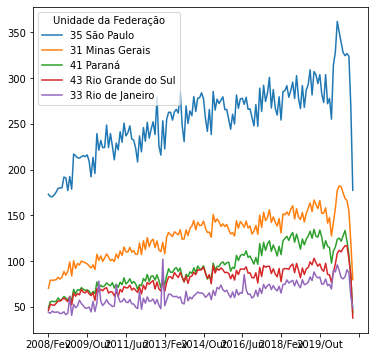

In [89]:
ordenado_por_total.head(5).T.plot(figsize=(6,6))


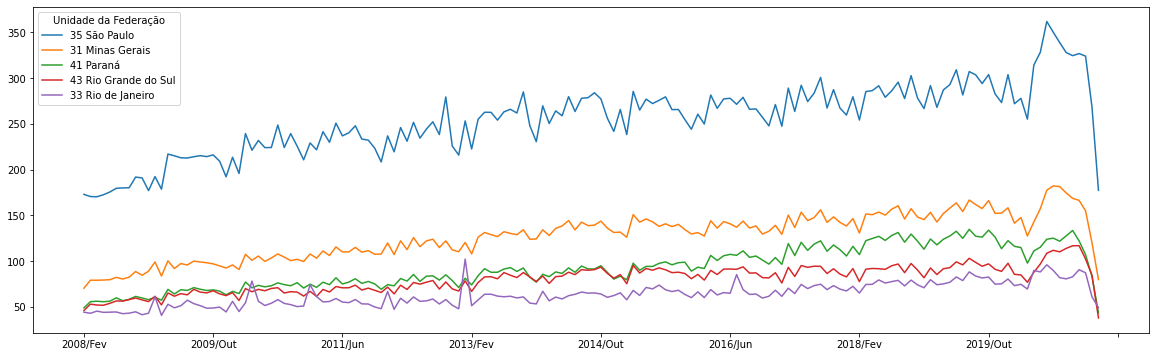

In [90]:
ordenado_por_total.head(5).T.plot(figsize=(20,6))


### DESAFIOS
1) Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações

2) Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.



## AULA 05


In [114]:
# pd.options.display.float_format = '{:.2f}'.format

mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2021/Mar'

In [97]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           177.40831771
31 Minas Gerais           79.780838
41 Paraná               43.48072907
43 Rio Grande do Sul     37.7988328
33 Rio de Janeiro       49.14988448
Name: 2021/Mar, dtype: float64

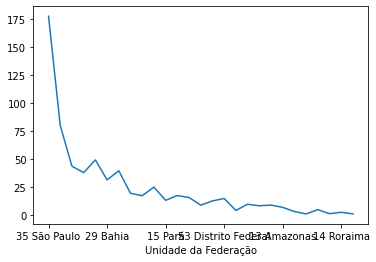

In [98]:
gastos_do_mais_recente.plot()

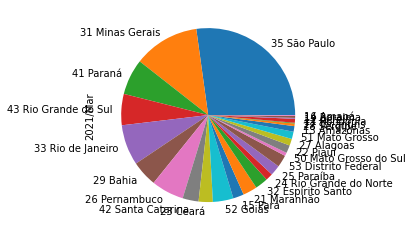

In [100]:
gastos_do_mais_recente.plot(kind='pie')

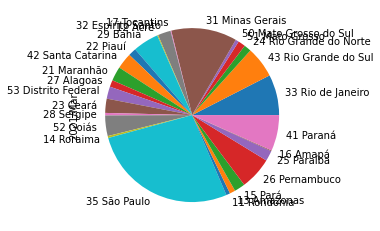

In [103]:
gastos_do_mais_recente.sample(frac=1).plot(kind='pie')

In [115]:
gastos_do_mais_recente

Unidade da Federação
35 São Paulo             177.41
31 Minas Gerais           79.78
41 Paraná                 43.48
43 Rio Grande do Sul      37.80
33 Rio de Janeiro         49.15
29 Bahia                  31.31
26 Pernambuco             39.47
42 Santa Catarina         19.38
23 Ceará                  17.17
52 Goiás                  24.87
15 Pará                   13.07
21 Maranhão               17.29
32 Espírito Santo         15.61
24 Rio Grande do Norte     8.73
25 Paraíba                12.52
53 Distrito Federal       14.73
50 Mato Grosso do Sul      4.04
22 Piauí                   9.54
27 Alagoas                 8.18
51 Mato Grosso             8.84
13 Amazonas                6.80
28 Sergipe                 3.08
17 Tocantins               0.93
11 Rondônia                4.73
12 Acre                    1.14
14 Roraima                 2.38
16 Amapá                   0.99
Name: 2021/Mar, dtype: float64

In [117]:
gastos_do_mais_recente / gastos_do_mais_recente.loc['33 Rio de Janeiro']


Unidade da Federação
35 São Paulo             3.61
31 Minas Gerais          1.62
41 Paraná                0.88
43 Rio Grande do Sul     0.77
33 Rio de Janeiro        1.00
29 Bahia                 0.64
26 Pernambuco            0.80
42 Santa Catarina        0.39
23 Ceará                 0.35
52 Goiás                 0.51
15 Pará                  0.27
21 Maranhão              0.35
32 Espírito Santo        0.32
24 Rio Grande do Norte   0.18
25 Paraíba               0.25
53 Distrito Federal      0.30
50 Mato Grosso do Sul    0.08
22 Piauí                 0.19
27 Alagoas               0.17
51 Mato Grosso           0.18
13 Amazonas              0.14
28 Sergipe               0.06
17 Tocantins             0.02
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.05
16 Amapá                 0.02
Name: 2021/Mar, dtype: float64

In [122]:
# :: DESAFIO 02 ::
(gastos_do_mais_recente / gastos_do_mais_recente.loc['35 São Paulo']).head()

Unidade da Federação
35 São Paulo           1.00
31 Minas Gerais        0.45
41 Paraná              0.25
43 Rio Grande do Sul   0.21
33 Rio de Janeiro      0.28
Name: 2021/Mar, dtype: float64

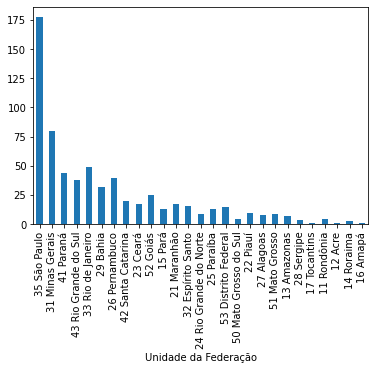

In [120]:
gastos_do_mais_recente.plot(kind='bar')

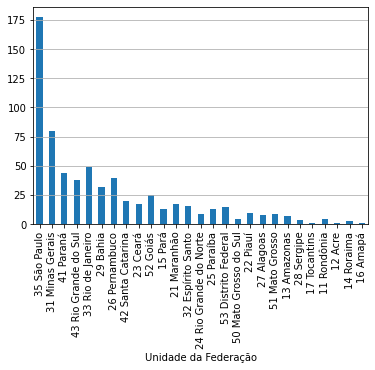

In [128]:
# :: DESAFIO 01 ::
gastos_do_mais_recente.plot(kind='bar')
plt.grid(axis='y')

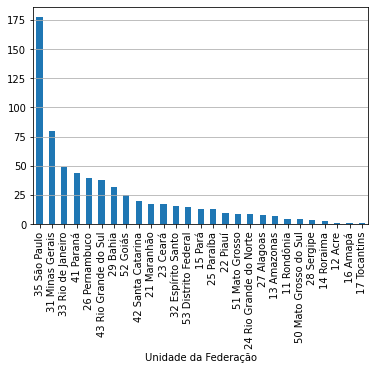

In [125]:
gastos_do_mais_recente.sort_values(ascending=False).plot(kind='bar')
plt.grid(axis='y')

In [180]:
# :: DESAFIO 03 ::
# preparacao
#  https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o
populacao = {
    '35 São Paulo': 46_289_333,
    '31 Minas Gerais': 21_292_666
}

sp_mg = pd.DataFrame(gastos_do_mais_recente[populacao.keys()])
sp_mg_porporcional = sp_mg['2021/Mar'] * 1_000_000  / list(populacao.values())
sp_mg_porporcional



Unidade da Federação
35 São Paulo      3.83
31 Minas Gerais   3.75
Name: 2021/Mar, dtype: float64

In [183]:
# :: DESAFIO 03 ::
# comparacao
sp_mg_porporcional / sp_mg_porporcional['35 São Paulo']

Unidade da Federação
35 São Paulo      1.00
31 Minas Gerais   0.98
Name: 2021/Mar, dtype: float64

### DESAFIOS

1) Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

2) Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

3) Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

4) Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

5) Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

# SUPER DESAFIO

Escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.

# Outros


In [94]:
# https://realpython.com/python-matplotlib-guide/

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)


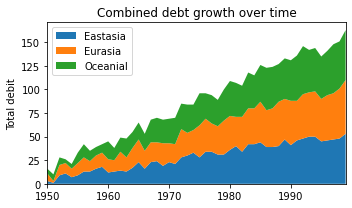

In [95]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,3))
ax.stackplot(yrs, rng+rnd, labels=['Eastasia', 'Eurasia', 'Oceanial'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debit')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

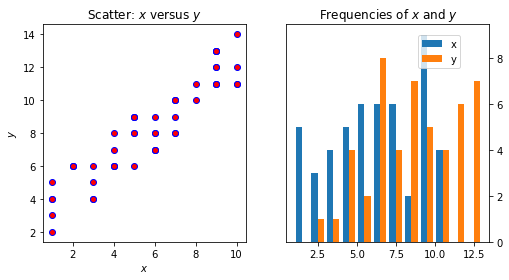

In [96]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1,5, size=x.size)
data = np.column_stack((x,y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

# >>> fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
# >>> ax1, ax2, ax3, ax4 = ax.flatten()  # flatten a 2d NumPy array to 1d


ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x','y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()
